In [1]:
import pandas as pd
df = pd.read_csv('../datasets/salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [2]:
inputs = df.drop('salary_more_then_100k',axis='columns')
target = df.salary_more_then_100k

In [3]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [4]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [6]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [7]:
from sklearn import tree

In [8]:
model = tree.DecisionTreeClassifier()

In [9]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [10]:
model.score(inputs_n,target)

1.0

Decision tree vs Logistic Regression for classification problems
https://dzone.com/articles/logistic-regression-vs-decision-tree

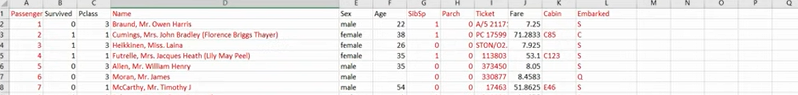

In [11]:
df = pd.read_csv('../datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
inputs = df[['Pclass','Sex','Age','Fare']]
target = df['Survived']

In [24]:
le_sex = LabelEncoder()
inputs['sex_n'] = le_sex.fit_transform(inputs['Sex'])
inputs.head()

<ipython-input-24-dd5cb8827206>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['sex_n'] = le_sex.fit_transform(inputs['Sex'])


,Pclass,Sex,Age,Fare,sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [25]:
inputs_n = inputs.drop('Sex',axis='columns')
inputs_n.head()

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [26]:
model_ex = tree.DecisionTreeClassifier()
from sklearn.model_selection import train_test_split

In [32]:
inputs_n.isna().any()

Pclass    False
Age        True
Fare      False
sex_n     False
dtype: bool

In [33]:
inputs_n['Age'].fillna(inputs_n['Age'].mean(),inplace=True)

In [34]:
inputs_n.isna().any()

Pclass    False
Age       False
Fare      False
sex_n     False
dtype: bool

In [35]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n,target,test_size=0.2)

In [37]:
model_ex.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
model_ex.score(X_test,y_test)

0.8324022346368715

In [39]:
model_entr = tree.DecisionTreeClassifier(criterion='entropy')
model_entr.fit(X_train,y_train)
model_entr.score(X_test,y_test)

0.8156424581005587